# Exploratory Data Analysis on Train Dataset

Task:
- Perform exploratory data analysis on a dataset containing the average operating speed of popular trains in India.
- Create your own dataset(minimum 20 tuples) or find one online.
- As an intern under the Ministry of Railways, find the correlation between average operating speed and the frequency of train delays/accidents and derive any other relevant insights like passenger satisfaction, percentage of seat occupied, etc.
- You can use R, Python or any other tool for this task.


Note: It is good to make notes in your notebook or workplace while doing an EDA because the dtaa and insights might be needed and is handy if already noted. This saves time when you need data for presentations and discussions.



Firstly, import all the necessary libraries at once to eliminate the need to import libraries and modules as we need.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import random
%matplotlib inline

Read the dataset to a variable and visualize the data to see what our dataset looks like.

In [4]:
dataset = pd.read_csv("Train_Speed.csv", encoding = "ISO-8859-1")

In [5]:
dataset

,Train_No,Train_Name,Avg_Speed,Rating,Punctuality,Cleanliness,Food,Availability,Safety
0,12213/12214,Yeshvantapur - Delhi Sarai Rohilla AC Duronto ...,75.64,4.6,Good,Excellent,Good,Excellent,Excellent
1,12219/12220,Lokmanya Tilak Terminus - Secunderabad AC Duro...,64.38,4.6,Excellent,Excellent,Good,Excellent,Good
2,12221/12222,Pune - Howrah Duronto Express,72.42,4.6,Excellent,Excellent,Good,Good,Excellent
3,12223/12224,Lokmanya Tilak Terminus - Ernakulam Duronto Ex...,60.00,4.6,Excellent,Good,Good,Excellent,Excellent
4,12227/12228,Mumbai Central - Indore Duronto Express,65.99,4.8,Excellent,Excellent,Good,Excellent,Excellent
...,...,...,...,...,...,...,...,...,...
63,12931/12932,Mumbai Central - Ahmedabad Double Decker Express,69.00,4.6,Good,Excellent,Good,Excellent,Excellent
64,20805/20806,Visakhapatnam - New Delhi AP Express,76.00,4.2,Good,Good,Good,Excellent,Good
65,12451/12452,Shram Shakti Express,67.00,4.5,Excellent,Excellent,Good,Good,Excellent
66,17235/17236,KSR Bengaluru - Nagercoil Express,45.00,3.6,Good,Good,Average,Good,Good


Now, as a part of EDA, we find that the dataset contains 68 rows and 9 columns. Also we get some insights by using some state of the art methods.

In [6]:
# Get the names of all the labels or columns we have in our dataset.
dataset.columns

Index(['Train_No', 'Train_Name', 'Avg_Speed', 'Rating', 'Punctuality',
       'Cleanliness', 'Food', 'Availability', 'Safety'],
      dtype='object')

So we are interested in speed aand punctuality related data to find some correlation between them. Also we will perform EDA using all labels to find any useful hidden relation.

To get information about the data types of labels and some other info like memory usage.

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Train_No      68 non-null     object 
 1   Train_Name    68 non-null     object 
 2   Avg_Speed     68 non-null     float64
 3   Rating        68 non-null     float64
 4   Punctuality   68 non-null     object 
 5   Cleanliness   68 non-null     object 
 6   Food          68 non-null     object 
 7   Availability  68 non-null     object 
 8   Safety        68 non-null     object 
dtypes: float64(2), object(7)
memory usage: 4.9+ KB


To get mathematical info using the columns containing numeric values.

In [8]:
dataset.describe()

,Avg_Speed,Rating
count,68.000000,68.000000
mean,74.015294,4.432353
std,8.308263,0.375138
min,45.000000,3.300000
25%,68.750000,4.275000
50%,74.500000,4.600000
75%,78.000000,4.600000
max,91.300000,5.000000


We check for null values. While this is a necessary practice in data preparation because if we have no value in a place where we need one, then that label for that particular row becomes useless. So we first find such places, edit it or remove the entire row.

In [9]:
dataset.isnull().sum()

Train_No        0
Train_Name      0
Avg_Speed       0
Rating          0
Punctuality     0
Cleanliness     0
Food            0
Availability    0
Safety          0
dtype: int64

Since we have no null values, we can continue to our next step in EDA.

Now we assign variables to various values of the labels in the dataset to use them to plot graphs.

In [10]:
avgspeed = dataset.Avg_Speed.values
punctual = dataset.Punctuality.values

Using rcParams, we set a default size(in our case large) to make large graphs for ease of visualisation. And then we plot a scatter graph to see if any clusters are forming withing the label values.

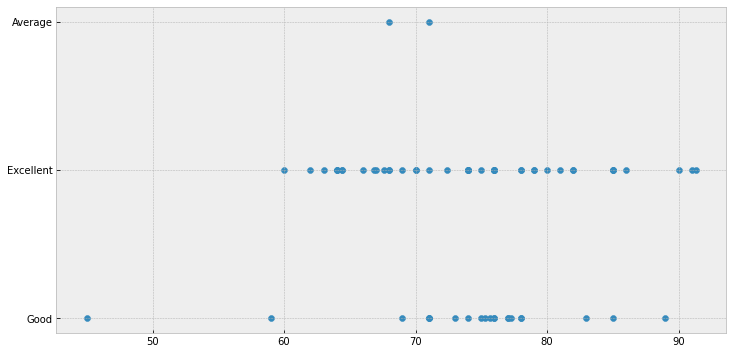

In [11]:
matplotlib.rcParams["figure.figsize"] = (12, 6)
plt.style.use("bmh")
plt.scatter(avgspeed, punctual)

A rough estimate could be made by observing the clusters formed between speeds 65-70 km/h for "Excellent" and 75-80 km/h for "Good" punctuality respectively. Almost all trains having a speed in range 65 to 70 km/h are never delayed. Also trains between 75 to 80 km/h speed are a bit delayed. since only two trains have a an average rating in punctuality, this means trains are running at a good rate.

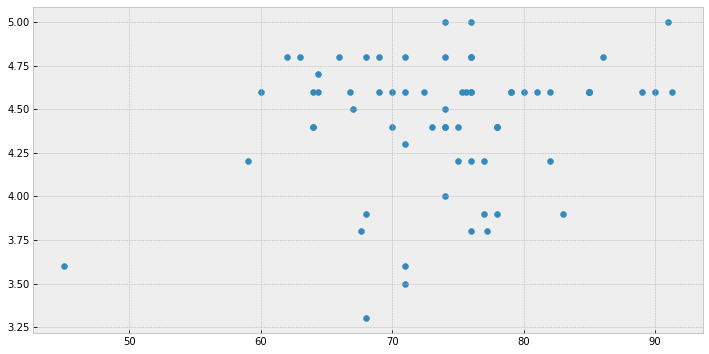

In [12]:
rating = dataset.Rating.values
plt.scatter(avgspeed, rating)

This scatter graph shows relation between overall ratings and speed of the train. Graph shows trains with speeds over 80 to have better rating. But overaal it doesnt seem to be a very supportive fact. So we try other visualisation methods to find other insights. For example, a bar plot.

<BarContainer object of 68 artists>

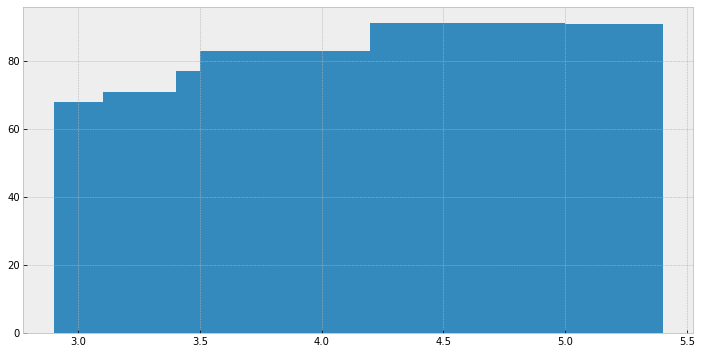

In [11]:
plt.bar(x = rating, height = avgspeed)

Refine the grapht by decreasing the width. Default width of a bar is 0.8. We use 0.05 as the width.

<BarContainer object of 68 artists>

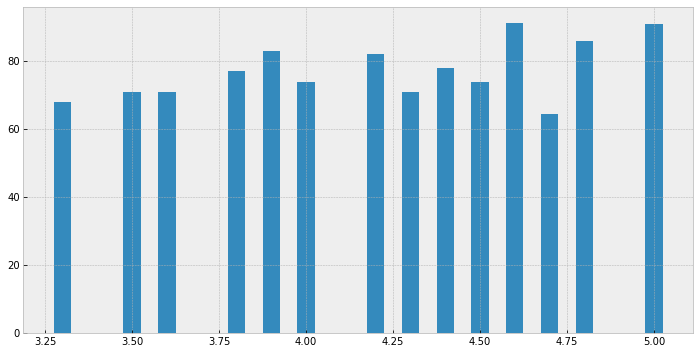

In [12]:
plt.bar(x = rating, height = avgspeed, width = 0.05)

Some of the major conclusions that can be drawn are:
1. Indian trains speed limits are 60 km/h to 90 km/h.
2. Trains having speed above 80 have better ratings which tells that higher speed is preferred by passengers maybe because travel time gets short.

To support our conclusion we can draw a regression type plot using regplot method.

<AxesSubplot:xlabel='Avg_Speed', ylabel='Rating'>

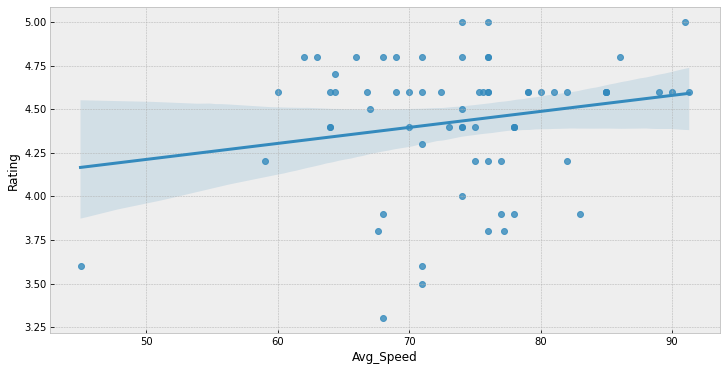

In [13]:
sns.regplot(x= "Avg_Speed", y= "Rating", data = dataset)

Here by observing, clearly the ratings get better as the speed increases.

Now we try to find other insights about the data we have.
Lets find out correlation between speed and availability of the train.

In [14]:
# Rank will be a function to alter the data to add more diversity. This is an example and in real world tasks, the data has
# to be filled after quality research.
def rank(array):
    List1 = []
    i = 0
    while i in range(len(array)):
        if array[i] == "Excellent":
            r = random.uniform(4.0, 5.0)
            r = round(r, 1)
            List1.append(r)
        elif array[i] == "Good":
            r = random.uniform(3.0, 4.0)
            r = round(r, 1)
            List1.append(r)
        elif array[i] == "Average":
            r = random.uniform(2.0, 3.0)
            r = round(r, 1)
            List1.append(r)
        else:
            r = random.uniform(1.0, 2.0)
            r = round(r, 1)
            List1.append(r)
        i += 1
    return List1

Now using the function we can assign values to the keywords.

In [15]:
dataset["Punctuality_Rating"] = rank(dataset.Punctuality.values)
dataset["Cleanliness_Rating"] = rank(dataset.Cleanliness.values)
dataset["Food_Rating"] = rank(dataset.Food.values)
dataset["Availability_Rating"] = rank(dataset.Availability.values)
dataset["Safety_Rating"] = rank(dataset.Safety.values)
dataset

,Train_No,Train_Name,Avg_Speed,Rating,Punctuality,Cleanliness,Food,Availability,Safety,Punctuality_Rating,Cleanliness_Rating,Food_Rating,Availability_Rating,Safety_Rating
0,12213/12214,Yeshvantapur - Delhi Sarai Rohilla AC Duronto ...,75.64,4.6,Good,Excellent,Good,Excellent,Excellent,3.6,4.2,3.3,4.9,4.7
1,12219/12220,Lokmanya Tilak Terminus - Secunderabad AC Duro...,64.38,4.6,Excellent,Excellent,Good,Excellent,Good,5.0,4.0,3.4,4.7,3.1
2,12221/12222,Pune - Howrah Duronto Express,72.42,4.6,Excellent,Excellent,Good,Good,Excellent,4.6,4.8,3.2,3.2,4.8
3,12223/12224,Lokmanya Tilak Terminus - Ernakulam Duronto Ex...,60.00,4.6,Excellent,Good,Good,Excellent,Excellent,4.5,3.9,3.8,4.0,5.0
4,12227/12228,Mumbai Central - Indore Duronto Express,65.99,4.8,Excellent,Excellent,Good,Excellent,Excellent,4.1,4.9,3.5,4.9,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,12931/12932,Mumbai Central - Ahmedabad Double Decker Express,69.00,4.6,Good,Excellent,Good,Excellent,Excellent,3.6,4.5,3.6,4.8,4.5
64,20805/20806,Visakhapatnam - New Delhi AP Express,76.00,4.2,Good,Good,Good,Excellent,Good,3.6,3.0,4.0,4.5,3.7
65,12451/12452,Shram Shakti Express,67.00,4.5,Excellent,Excellent,Good,Good,Excellent,4.8,4.7,3.4,3.4,4.8
66,17235/17236,KSR Bengaluru - Nagercoil Express,45.00,3.6,Good,Good,Average,Good,Good,3.0,3.9,2.1,3.9,3.4


Now we have columns which we will use for regression. We will perform regression on all five informations we have to find out any correlation.

<AxesSubplot:xlabel='Avg_Speed', ylabel='Punctuality_Rating'>

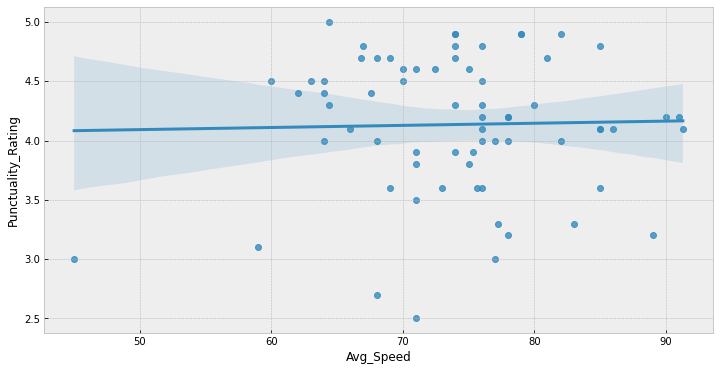

In [16]:
sns.regplot(x= "Avg_Speed", y= "Punctuality_Rating", data = dataset)

If sometimes you do not have any useful insight then it might be due to one of these underlying reasons:
1. Dataset is small.
2. Data for a particular label has less variability or diversity.

To avoid this use large and diverse datasets.

We plot everything on the same graph to save time and get relation between labels. Make sure coordinate are of same type. Do color correction for better visibility.

<AxesSubplot:xlabel='Avg_Speed', ylabel='Safety_Rating'>

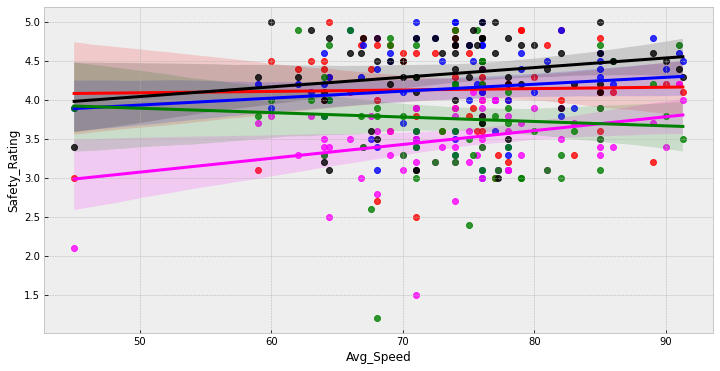

In [17]:
sns.regplot(x= "Avg_Speed", y= "Punctuality_Rating", data = dataset, color = "red")
sns.regplot(x= "Avg_Speed", y= "Cleanliness_Rating", data = dataset, color = "blue")
sns.regplot(x= "Avg_Speed", y= "Food_Rating", data = dataset, color = "magenta")
sns.regplot(x= "Avg_Speed", y= "Availability_Rating", data = dataset, color = "green")
sns.regplot(x= "Avg_Speed", y= "Safety_Rating", data = dataset, color = "black")

Conclusions:
1. The mostly used trains have a speed between 60 to 80 speed range.
2. As speed increases, the quality of food, cleanliness and safety increses. Now this is because the faster the train is, the higher is the fare. So with higher fare comes better facilities.
3. Availibility and punctuality is same for all trains which means almost all train are punctual and available equally.

Suggestions:
1. More focus has to be given on the trains with poor overall ratings .
2. Trains average operating speed must be above 60 km/h.